In [1]:
#import the libraries that we will used in the project
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization 
import seaborn as sns # data visualization
from sklearn.linear_model import LogisticRegression #logictic regression model
from sklearn.model_selection import train_test_split #split the dataset into train and test   


In [2]:
# We are reading our dataset 
df = pd.read_csv("heart.csv")
#Displaying First Five Records
df.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Displaying last Five Records
df.tail()

In [12]:
#print the shape of the dataset
print("the shape of the dataset is {}".format(df.shape))

the shape of the dataset is (303, 14)


In [14]:
#exolore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [16]:
#Displaying Count Of Null Values ( if any ):
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
#get the domain of each column to know its values
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
   

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

as we saw above the data set has no missing value and all the values are int64,so the data is ready to directly work with it.


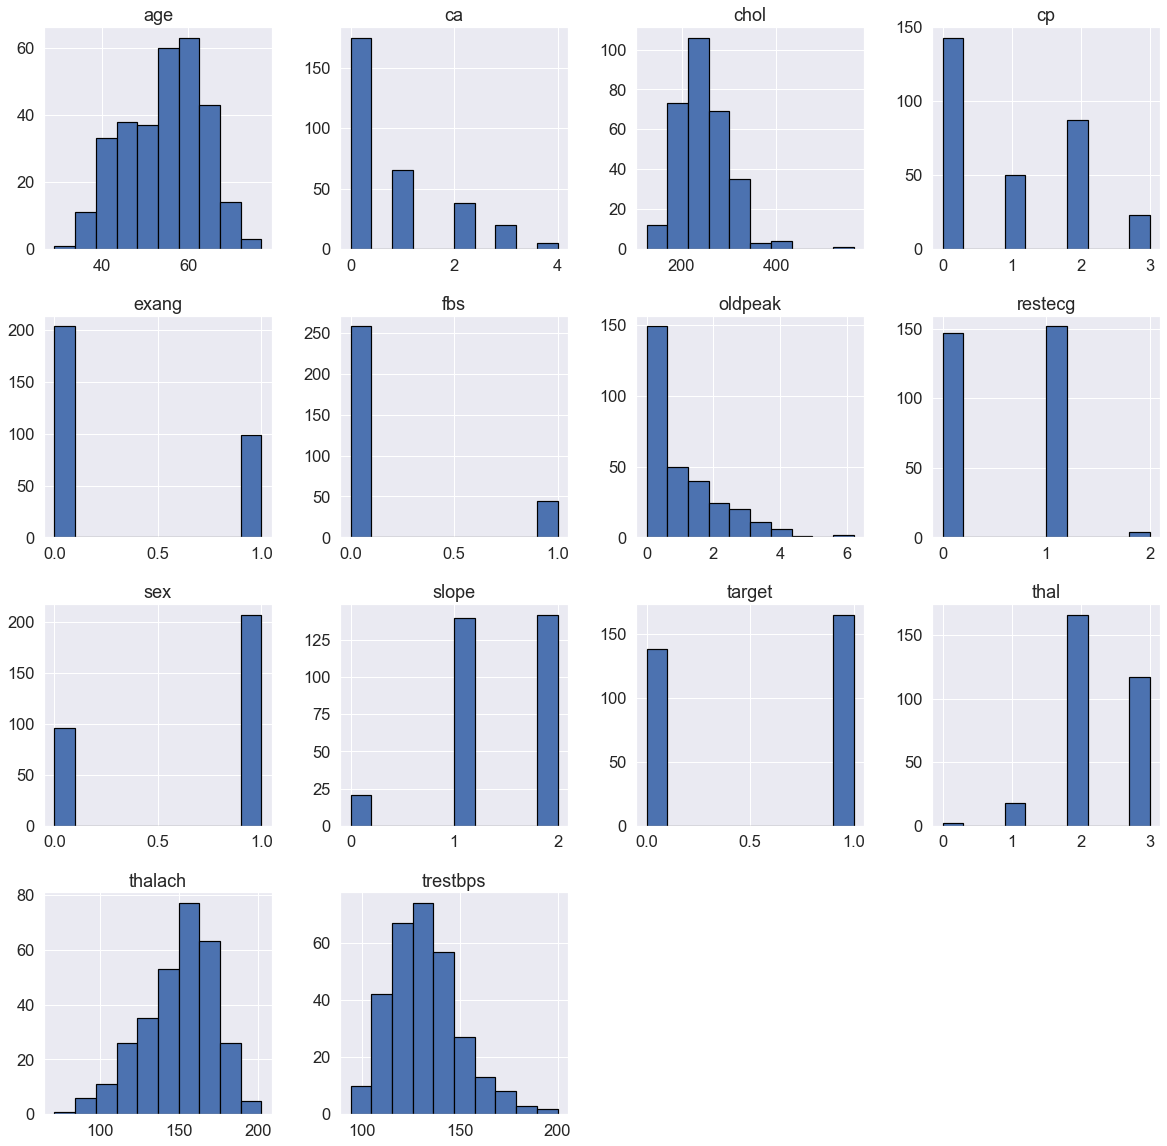

In [30]:
#we draw the histogram of each column
#we usually use histogram to represent the distribution of the data in better way 
sns.set(font_scale=1.5)
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

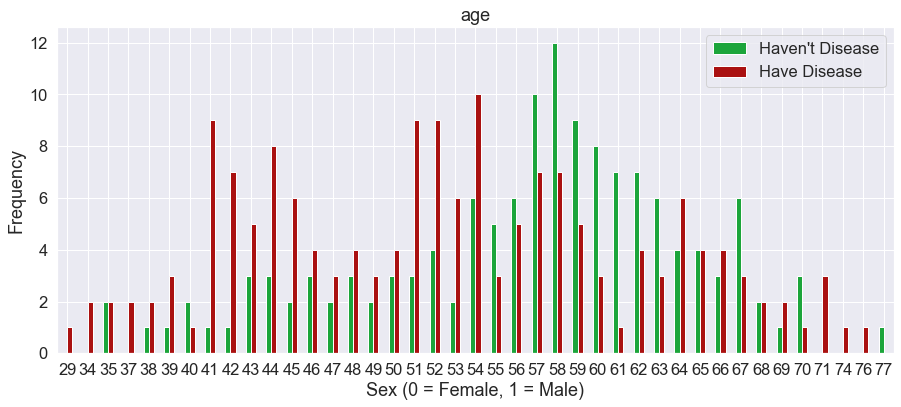

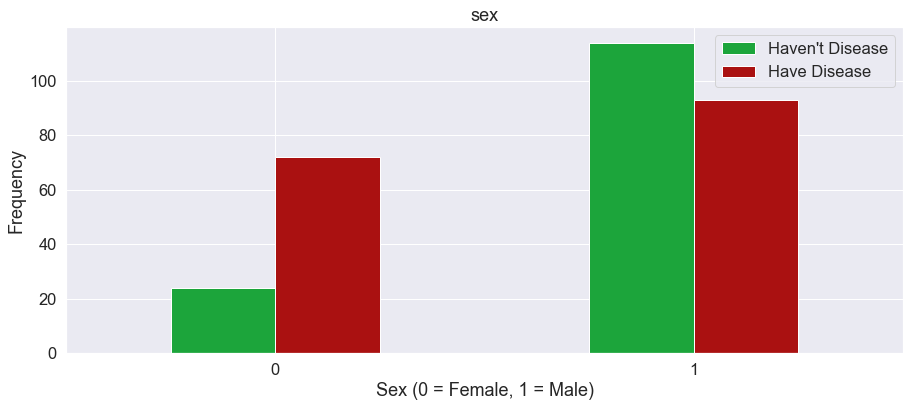

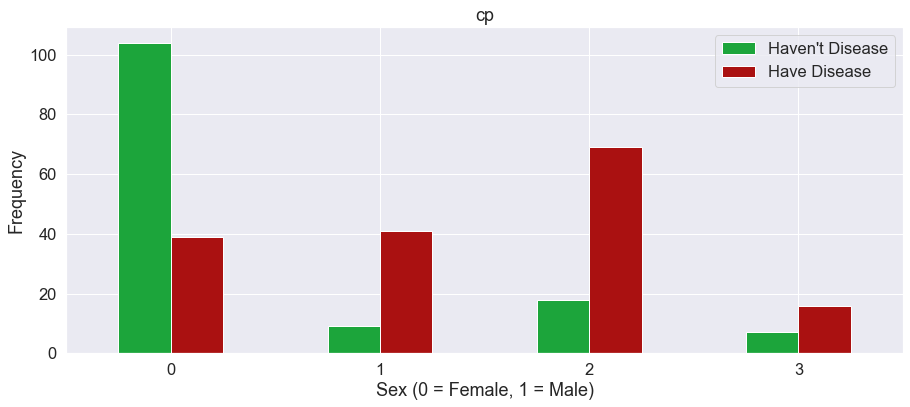

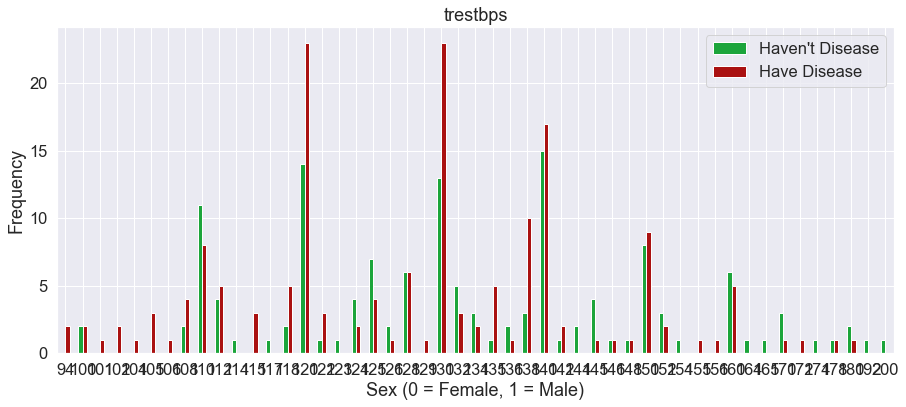

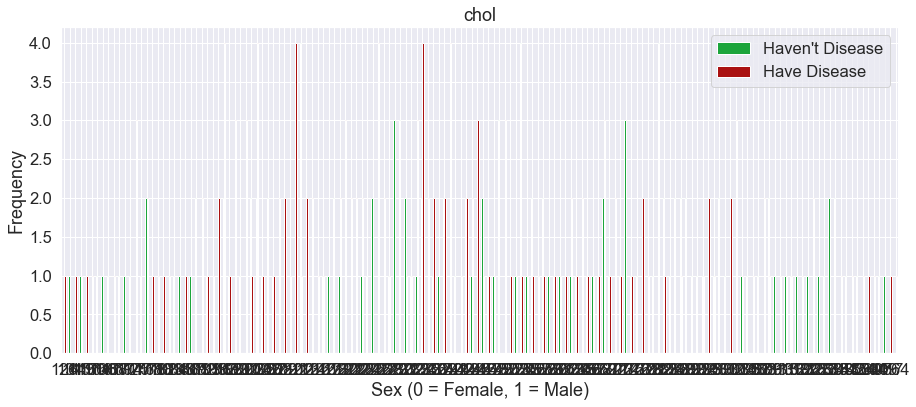

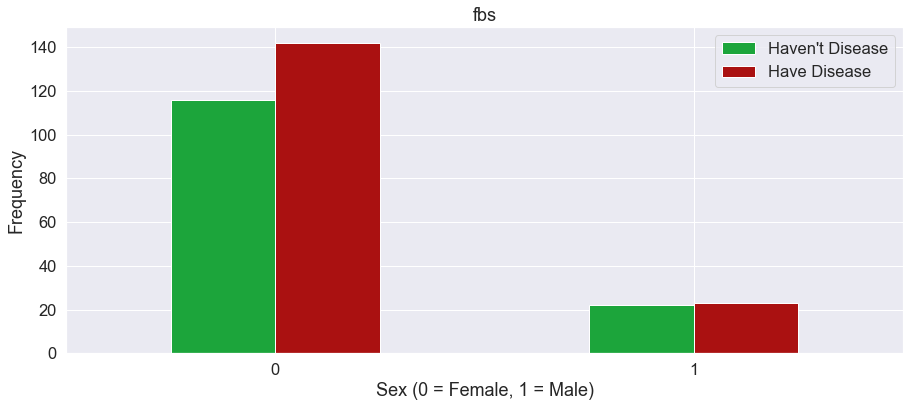

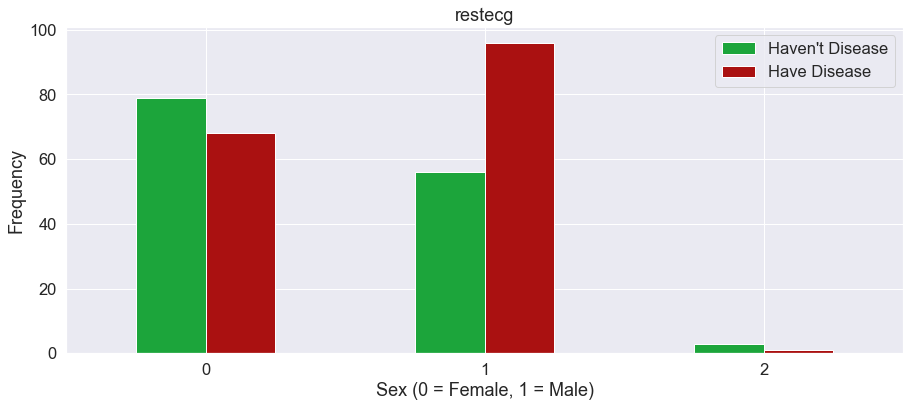

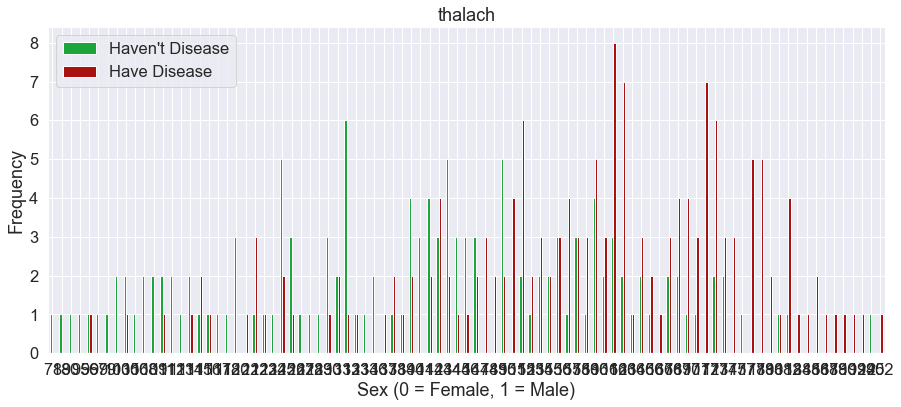

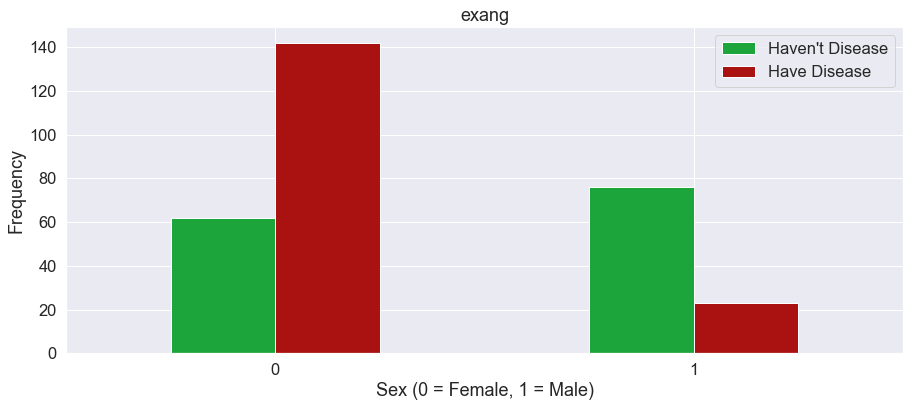

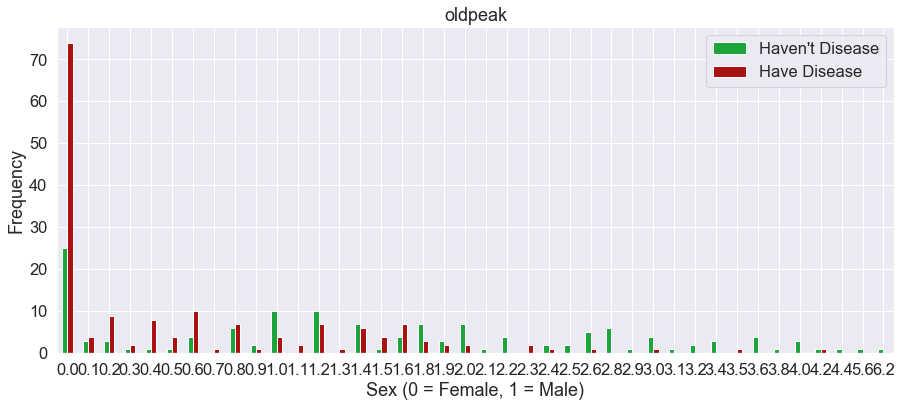

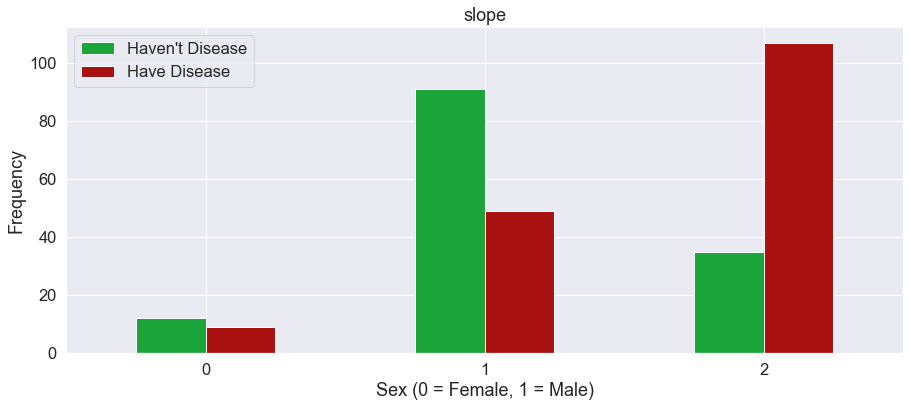

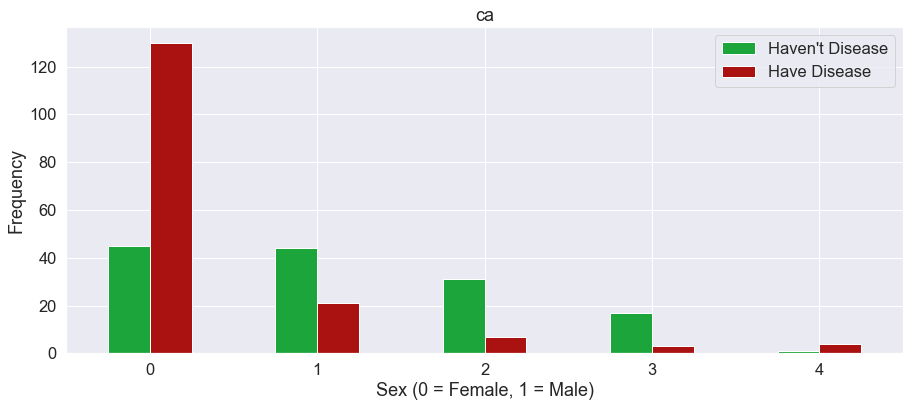

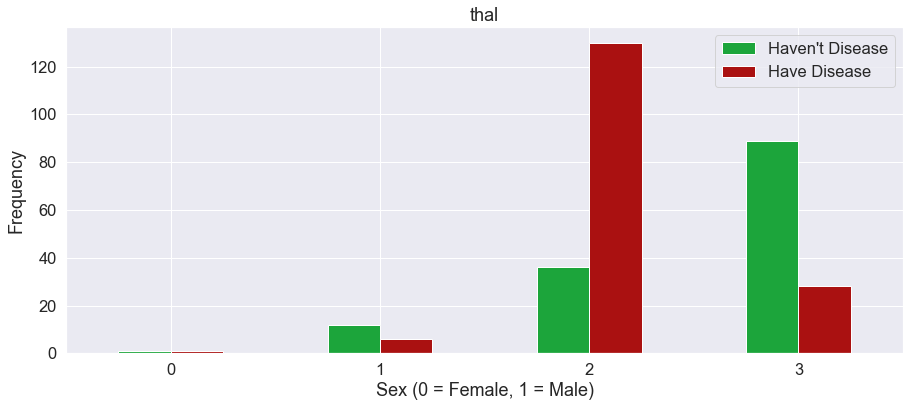

In [50]:
for column1 in df.columns:
    if column1=='target':
        continue
    pd.crosstab(df[column1],df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
    plt.title(column1)
    plt.xlabel('Sex (0 = Female, 1 = Male)')
    plt.xticks(rotation=0)
    plt.legend(["Haven't Disease", "Have Disease"])
    plt.ylabel('Frequency')
    plt.show()

age


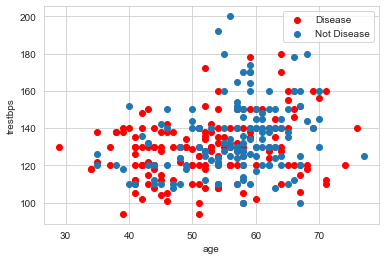

age


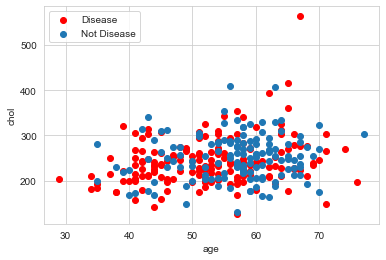

age


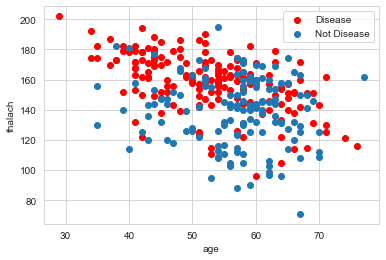

age


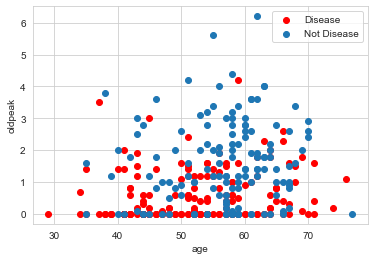

age


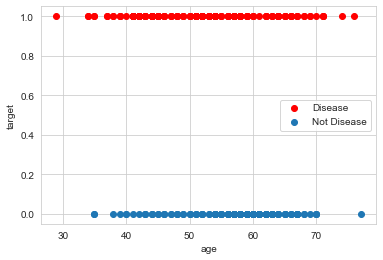

trestbps


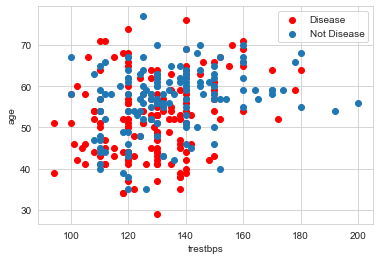

trestbps


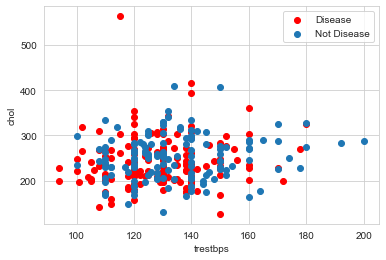

trestbps


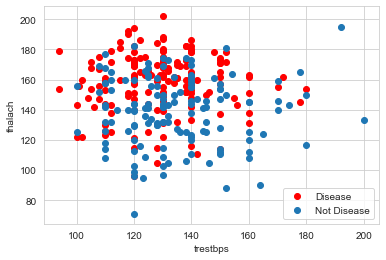

trestbps


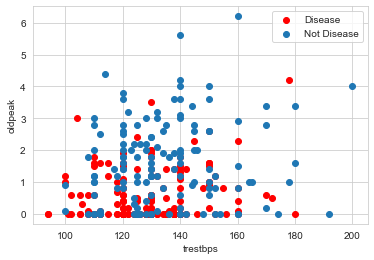

trestbps


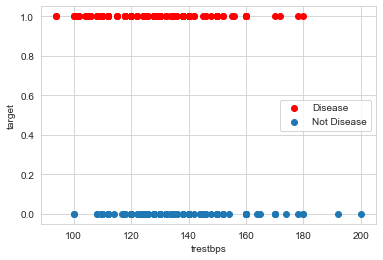

chol


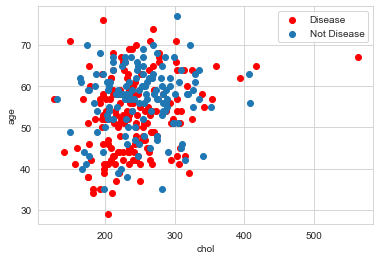

chol


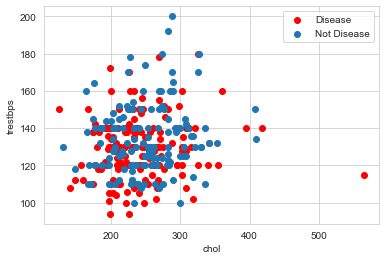

chol


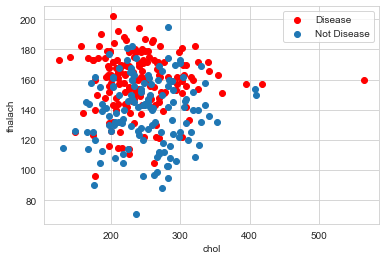

chol


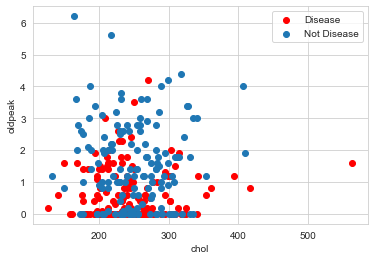

chol


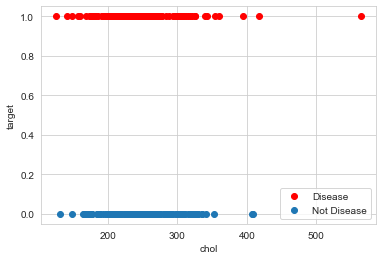

thalach


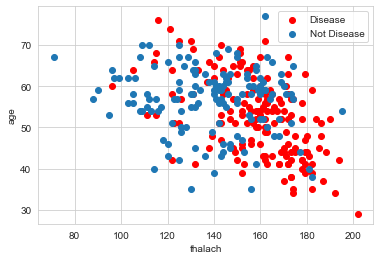

thalach


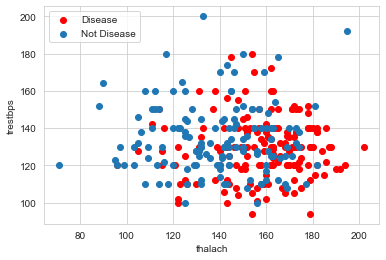

thalach


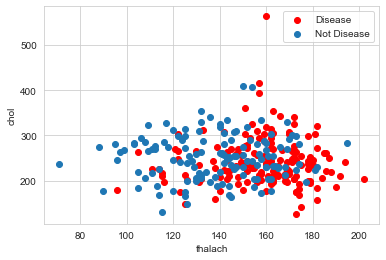

thalach


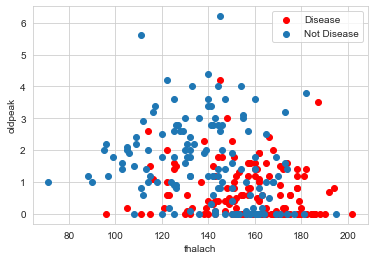

thalach


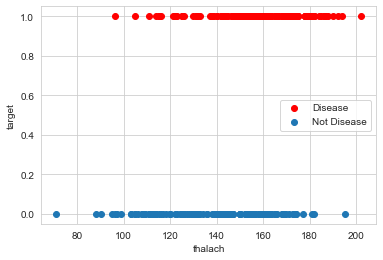

oldpeak


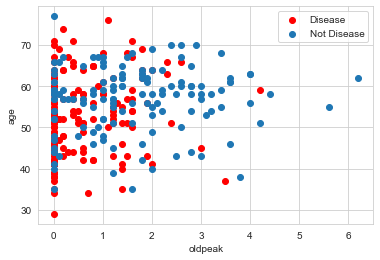

oldpeak


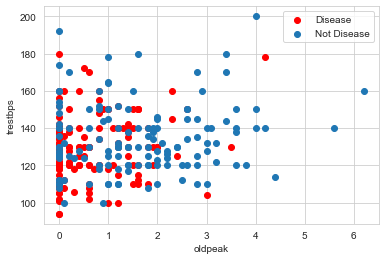

oldpeak


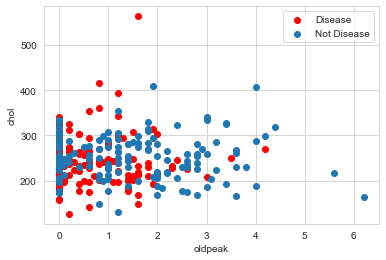

oldpeak


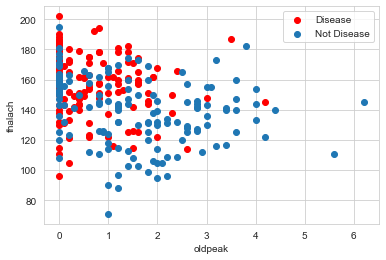

oldpeak


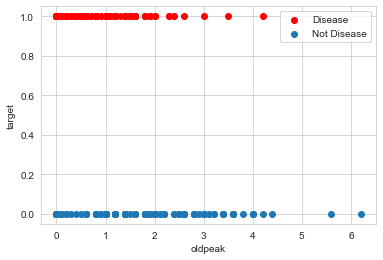

target


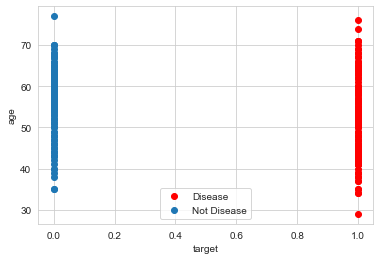

target


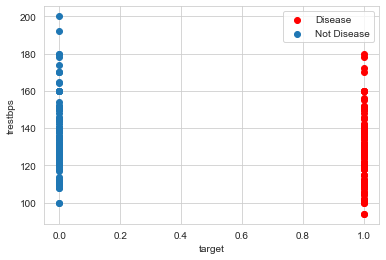

target


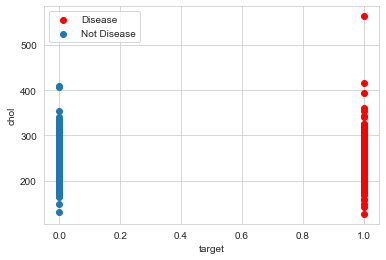

target


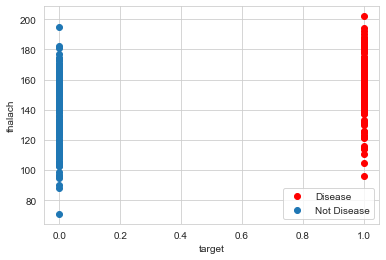

target


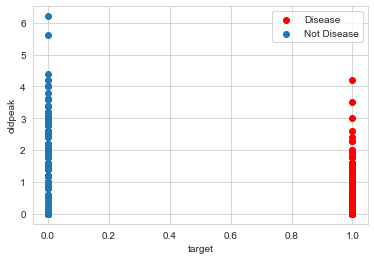

In [14]:
# we draw the scatter plot 
#we will not draw the scatter for the following features as it is categorical.
cate=['ca','cp','sex','exang','fbs','restecg','slope','thal']
for column1 in df.columns: #we will skip these feaures
    if column1 in cate:
        continue
    
    for column2 in df.columns:
        if column2==column1 or column2 in cate  :#we will skip these feaures
            continue 
        print(column1)
        #design the scatter for each feature
        plt.scatter(x=df[column1][df.target==1], y=df[column2][(df.target==1)], c="red")
        plt.scatter(x=df[column1][df.target==0], y=df[column2][(df.target==0)])
        plt.legend(["Disease", "Not Disease"])
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.show()
        
    print('==============================')

In [40]:
#we will use the corr() to measure the correlation
for column1 in df.columns:
    
    print(column1)
    print(df.corr()[column1].sort_values())
    print('==============================')

age
thalach    -0.40
target     -0.23
slope      -0.17
restecg    -0.12
sex        -0.10
cp         -0.07
thal        0.07
exang       0.10
fbs         0.12
oldpeak     0.21
chol        0.21
ca          0.28
trestbps    0.28
age         1.00
Name: age, dtype: float64
sex
target     -0.28
chol       -0.20
age        -0.10
restecg    -0.06
trestbps   -0.06
cp         -0.05
thalach    -0.04
slope      -0.03
fbs         0.05
oldpeak     0.10
ca          0.12
exang       0.14
thal        0.21
sex         1.00
Name: sex, dtype: float64
cp
exang      -0.39
ca         -0.18
thal       -0.16
oldpeak    -0.15
chol       -0.08
age        -0.07
sex        -0.05
restecg     0.04
trestbps    0.05
fbs         0.09
slope       0.12
thalach     0.30
target      0.43
cp          1.00
Name: cp, dtype: float64
trestbps
target     -0.14
slope      -0.12
restecg    -0.11
sex        -0.06
thalach    -0.05
cp          0.05
thal        0.06
exang       0.07
ca          0.10
chol        0.12
fbs         0.18
ol

In [17]:
#Displaying Count Of Patients Have / Not Haven’t Heart Diseases
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

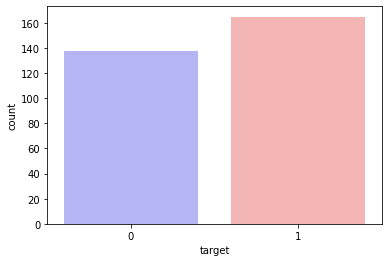

In [21]:
# as we deal with discret values (number of Patients )
#to count which Patients Have / Not Haven’t Heart Diseases we perfer to use countplot  
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [22]:
#Displaying Percentage Of Patients Having / Not Having Heart Diseases
countNoDisease = len(df[df.target == 0]) #Patients Not Having Heart Diseases
countHaveDisease = len(df[df.target == 1])#Patients Having Heart Diseases
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [27]:
#Displaying Percentage Of Male/Female Patients
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


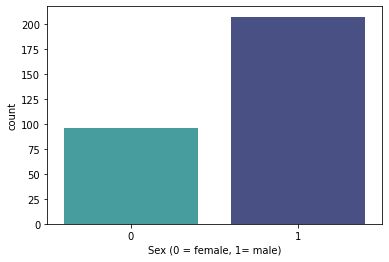

In [28]:
#BarPlot For Count Based Of Sex( Male/Female )
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [3]:
#split the data set into dependent and independent variables
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [4]:
#as we will need to normalize our data to change the value (numerical) to common scale without losing information
#Normalization Of Data
#Normalization Formula : Xnorm = ((x-x.min)/(x.max-x.min))
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [5]:
#We will split our data. 80% of our data will be train data and 20% of it will be test data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [6]:
#Transpose Matrices for Avoiding Confusion
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [7]:
#Implementing K-Nearest Neighbour (KNN) Model Classification :
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 83.61%


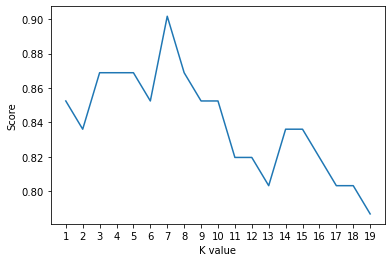

Maximum KNN Score is 90.16%


In [8]:
# Trying to find Best Feasible K Value
accuracies = {}# used for adding the accuracies for different algorithm we will apply
scoreList = []#used for adding the score of the knn with different neighbors
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)#tranning the model
    scoreList.append(knn2.score(x_test.T, y_test.T)) #make the prediction and measure accuracy for each neighbour
#drow the line chart for the knn accuracy and neighbour values    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
#Accuracy Predictor
acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [9]:
#Implementing Decision Tree classifier Model 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)#trainning the model
#Accuracy Predictor
acc = dtc.score(x_test.T, y_test.T)*100 #make the prediction and measure the accuracy
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 77.05%


In [10]:
#Implementing Support vector machine classifier
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)#trainning the model
#Accuracy Predictor
acc = svm.score(x_test.T,y_test.T)*100 #make the prediction and measure the accuracy
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 83.61%


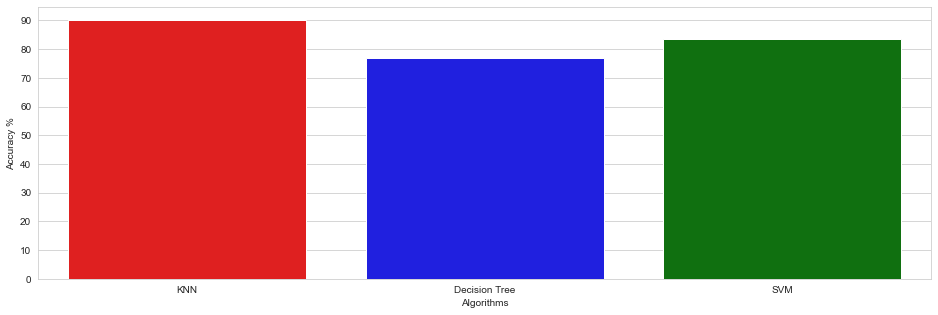

In [11]:
#Comparing The Proposed Model Classifications
colors = ["red","blue","green"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()